Theorieaufgabe 1 (1 Punkt): Zeigen Sie, dass jedes trigonometrische Polynom $f: \mathbb{R} \rightarrow \mathbb{R}$ gegeben durch

$$
f(x)=\sum_{k=-n}^n c_k \mathrm{e}^{\mathrm{i} k x}
$$

geschrieben werden kann als

$$
f(x)=\frac{a_0}{2}+\sum_{k=1}^n a_k \cos (k x)+b_k \sin (k x)
$$

und bestimmen Sie die Koeffizienten $a_k$ und $b_k$.

$$
e^{i x}=\cos (x)+i \sin (x)
$$

$$
\begin{aligned}
& f(x)=\sum_{k=-n}^n c_k \cdot e^{i k x}=\sum_{k=-n}^n c_k \cdot(\cos (k x)+i \cdot \sin (k x)) \\
& =\sum_{k=-n}^{-1} c_k \cdot(\cos (k x)+i \cdot \sin (k x))+c_0 \cdot(\cos (0)+i \cdot \sin (0))+\sum_{k=n}^1 c_k(\cos (k x)+i \sin (k x) \\
& c_0=\frac{a_0}{2} \Rightarrow a_0=2 c_0 \\
& \cos (k x)=\cos (-k x) \Rightarrow a_k=c_k+c_{-k} \\
& -\sin (-k x)=\sin (k x) \Rightarrow b_k=i c_k-i c_{-k}
\end{aligned}
$$

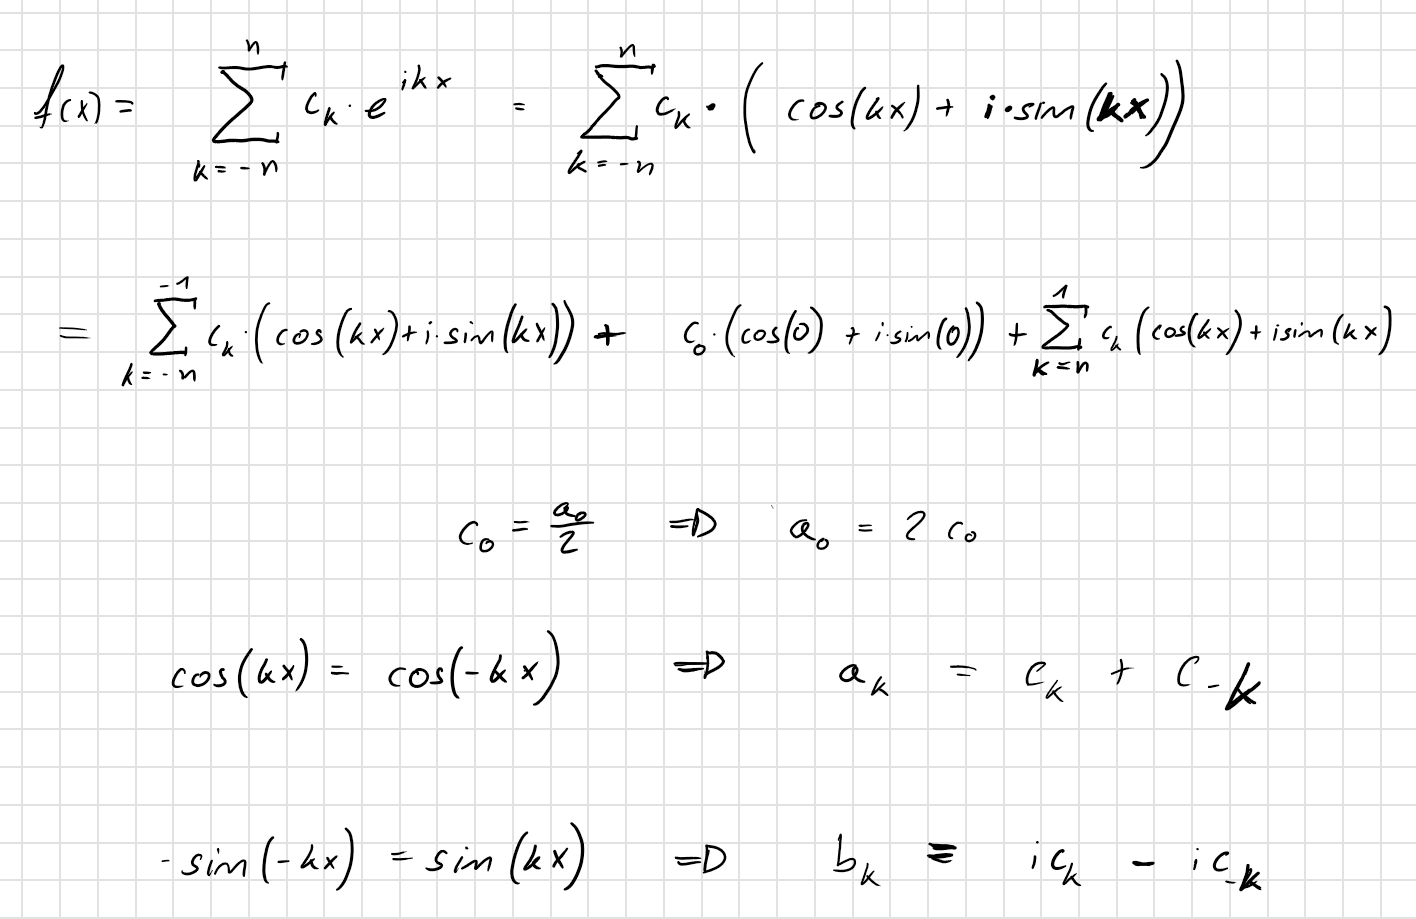



Theorieaufgabe 2 (4 Punkte): Gegeben sei die $2 \pi$-periodische Funktion $f$ gegeben durch

$$
\left.f\right|_{[0,2 \pi]}(x)= \begin{cases}1, & \text { für } 0<x<\pi \\ 0, & \text { für } x=0, \pi, 2 \pi \\ -1, & \text { für } \pi<x<2 \pi\end{cases}
$$


Mit $S_N$ bezeichnen wir die $N$-te Partialsumme der Fourier-Reihe von $f$ in der Darstellung

$$
S_N(x)=\frac{a_0}{2}+\sum_{k=1}^N a_k \cos (k x)+b_k \sin (k x) .
$$

1. Bestimmen Sie die Koeffizienten $a_k$ und $b_k$.
2. Skizzieren Sie $S_0, S_1, S_2, S_3$ und vergleichen Sie mit $f$.

Die Fourier-Koeffizienten $a_0, a_n$, und $b_n$ werden wie folgt berechnet:
1. Konstanter Anteil ( $a_0$ ):

$$
a_0=\frac{1}{T} \int_0^T f(x) d x
$$

2. Koeffizient der Kosinus-Terme $\left(a_n\right)$ :

$$
a_n=\frac{2}{T} \int_0^T f(x) \cos \left(\frac{2 \pi n x}{T}\right) d x \quad \text { für } n \geq 1
$$

3. Koeffizient der Sinus-Terme $\left(b_n\right)$ :

$$
b_n=\frac{2}{T} \int_0^T f(x) \sin \left(\frac{2 \pi n x}{T}\right) d x \quad \text { für } n \geq 1
$$


In [1]:
import math

In [3]:
def FFT(P):
    n = len(P)
    if n == 1:
        return P
    omega = exp(2*j * pi / n)
    P_even = FFT(P[0::2])
    P_odd = FFT(P[1::2])
    y_e = FFT(P_even)
    y_o = FFT(P_odd)
    y = [0] * n
    for k in range(n // 2):
        y[k] = y_e[k] + omega ** k * y_o[k]
        y[k + n // 2] = y_e[k] - omega ** k * y_o[k]
    return y

In [4]:
def IFFT(P):
    n = len(P)
    if n == 1:
        return P
    omega = (1/n)*exp(-2*j * pi / n)
    P_even = FFT(P[0::2])
    P_odd = FFT(P[1::2])
    y_e = FFT(P_even)
    y_o = FFT(P_odd)
    y = [0] * n
    for k in range(n // 2):
        y[k] = y_e[k] + omega ** k * y_o[k]
        y[k + n // 2] = y_e[k] - omega ** k * y_o[k]
    return y